## Введение в анализ данных, ИАД-1

## НИУ ВШЭ, 2019-20 учебный год

### Домашнее задание №1

Задание выполнил(а): _Разуваев Никита Сергеевич_

### Общая информация

__Дата выдачи:__ 11.02.2020

__Дедлайн:__ 21.02.2020 23:59

### О задании

В этом домашнем задании вы попрактикуетесь в работе с библиотеками numpy, pandas и matplotlib.

### Оценивание и штрафы

Каждая задача оценивается в 1 балл, за бонусную часть можно получить 1 балл.

Оценка за ДЗ вычисляется по следующей формуле:

$$
\left(\min(9, s_{\text{numpy}}) + \min(12, s_{\text{pandas}}) + \min(2, s_{\text{matplotlib}})\right) \times 10 / 23,
$$

где $s_{\text{numpy}}$ и $s_{\text{pandas}}$ — количество баллов, которое вы набрали за соответствующую часть. Задач больше, чем необходимо сделать для получения полного балла за ДЗ — вы можете сделать те, которые вам больше нравятся, или сделать все, чтобы дополнительно потренироваться. За каждую задачу сверх обязательных (9 в первой части, 12 во второй и 2 в третьей) дается 0.5 бонусных балла. Таким образом, за это домашнее задание можно получить 2 бонусных балла.

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

## Часть 1. Numpy

In [0]:
import numpy as np

Во всех задачах необходимо написать код решения внутри функции и проверить его работу, вызвав функцию для данных из условия.

При решении задач запрещается использовать циклы (`for`, `while`) и оператор `if`.

Везде, где встречаются массивы или матрицы, подразумевается, что это `numpy.array`. 

### 1

Напишите функцию, возвращающую округленную взвешенную сумму оценок по данным оценкам и весам. Можете посчитать свою оценку за курс :) В нашем случае вес экзамена равен 0.3, вес домашек - 0.4, вес контрольной - 0.2, вес самостоятельных - 0.1. Например, если за экзамен у вас 7, за домашки 10, за контрольную 8, а за самостоятельные 6, то вы получите отличную оценку 8!

In [0]:
def result_mark(weights: np.array, marks: np.array) -> int:
    # your code here
    res = np.sum(weights*marks, axis=0)
    rnd = res - int(res) >= 0.5 or 0
    return int(res + rnd)

In [0]:
weights = np.array([0.3, 0.4, 0.2, 0.1])
marks = np.array([7, 10, 8, 6])

assert result_mark(weights, marks) == 8

In [0]:
weights = np.array([0.3, 0.4, 0.2, 0.1])
marks = np.array([7, 0, 8, 6])

assert result_mark(weights, marks) == 4

### 2

Напишите функцию, меняющую каждое третье (начиная с 0) значение массива целых чисел на заданное число. Например, если на вход поступает массив `array([3, 5, 1, 0, -3, 22, 213436])` и число `-111`, то на выходе должен получиться массив `array([-111, 5, 1, -111, -3, 22, -111])`.

In [0]:
def change_array(array: np.array, number: int) -> np.array:
    # your code here
    array[::3] = number
    return array

In [0]:
array = np.array([3, 5, 1, 0, -3, 22, 213436])
number = -111

assert np.allclose(change_array(array, number), np.array([-111, 5, 1, -111, -3, 22, -111]))

In [0]:
array = np.array([3, 14, 15, 92, 6])
number = 8

assert np.allclose(change_array(array, number), np.array([8, 14, 15, 8, 6]))

### 3

Напишите функцию, выдающую индексы «близких» элементов заданных массивов, а именно тех пар элементов, чей модуль разницы не превосходит заданного значения. Например, если на вход поступают массив `array([1.5, 0.5, 2, -4.1, -3, 6, -1])`, массив `array([1.2, 0.5, 1, -4, 3, 0, -1.2])` и число `0.5`, то на выходе должен получиться массив `array([0, 1, 3, 6])` (**важно: не `tuple`, а одномерный массив типа `numpy.ndarray` (то есть `.ndim` от него равно 1)!**).

In [0]:
def find_close(array1: np.array, array2: np.array,
               precision: float) -> np.array:
    # your code here
    return np.arange(len(array1))[np.abs(array1 - array2) <= precision]

In [0]:
array1 = np.array([1.5, 0.5, 2, -4.1, -3, 6, -1])
array2 = np.array([1.2, 0.5, 1, -4.0,  3, 0, -1.2])
precision = 0.5
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([0, 1, 3, 6]))

In [0]:
array1 = np.array([3.1415, 2.7182, 1.6180, 6.6261])
array2 = np.array([6.6730, 1.3807, -1,     6.0222])
precision = 1.7
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([1, 3]))

### 4

Напишите функцию, которая составляет блочную матрицу из четырех блоков, где каждый блок - это заданная матрица. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
\end{pmatrix},
$$
то ответом будет матрица
$$
\begin{pmatrix}
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
\end{pmatrix}
$$

In [0]:
def block_matrix(block: np.array) -> np.array:
    # your code here
    return np.block([[block, block], 
                     [block, block]])

In [0]:
block = np.array([[1, 3, 3], [7, 0, 0]])

assert np.allclose(
    block_matrix(block),
    np.array([[1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0],
              [1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0]])
)

### 5

Напишите функцию, вычисляющую произведение всех ненулевых диагональных элементов на диагонали данной квадратной матрицы. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
6 & 7 & 8\\
\end{pmatrix},
$$
то ответом будет 32.

Элементы матрицы считать целочисленными.

In [0]:
def diag_prod(matrix: np.array) -> int:
    # your code here
    res = np.diag(matrix)
    return np.prod(res[res != 0])

In [0]:
matrix = np.array([[0, 1, 2, 3],
                   [4, 5, 6, 7],
                   [8, 9, 10, 11],
                   [12, 13, 14, 15]])

assert diag_prod(matrix) == 750

### 6

Для улучшения качества работы некоторых алгоритмов машинного обучения может быть полезно использовать [нормализацию данных](https://vk.cc/8xmfQk), чтобы привести признаки в выборке к одному масштабу — а именно, из каждого столбца вычесть среднее его значений и поделить на их стандартное отклонение. Напишите функцию, нормализующую входящую матрицу (по столбцам). Например, если на вход подается матрица 
$$
\begin{pmatrix}
1 & 4 & 4200\\
0 & 10 & 5000\\
1 & 2 & 1000\\
\end{pmatrix},
$$
то результатом с точностью до сотых будет матрица
$$
\begin{pmatrix}
0.71 & -0.39 & 0.46\\
-1.41 & 1.37 & 0.93\\
0.71 & -0.98 & -1.39\\
\end{pmatrix}
$$

Учтите, что в вашем матрице не должно получаться никаких nan. Подумайте, в каком случае они могут возникнуть и как обойти эту проблему.

_Подсказка. Казалось бы, при чем тут деление на ноль._

In [0]:
def normalize(matrix: np.array) -> np.array:
    # your code here
    mean = np.mean(matrix, axis=0)
    std = np.std(matrix, axis=0)
    std[std == 0] = 1
    return (matrix - mean)/std

In [0]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])

assert np.allclose(
    normalize(matrix),
    np.array([[ 0.7071, -0.39223,  0.46291],
              [-1.4142,  1.37281,  0.92582],
              [ 0.7071, -0.98058, -1.38873]])
)

In [0]:
matrix = np.array([[-7, 2, 42], [2, 10, 50], [5, 4, 10]])

assert np.allclose(
    normalize(matrix),
    np.array([[-1.37281, -0.98058,  0.46291],
              [ 0.39223,  1.37281,  0.92582],
              [ 0.98058, -0.39223, -1.38873]])
)

### 7

Напишите функцию, вычисляющую какую-нибудь первообразную данного полинома (в качестве константы возьмите $0$). Например, если на вход поступает массив коэффициентов `array([4, 6, 0, 1])`, что соответствует полиному $4x^3 + 6x^2 + 1$, на выходе получается массив коэффициентов `array([1, 2, 0, 1, -2])`, соответствующий полиному $x^4 + 2x^3 + x - 2$.

In [0]:
def antiderivative(coefs: np.array) -> np.array:
    # your code here
    deg = 1 / np.arange(len(coefs), 0, -1)
    return np.hstack((deg * coefs, 0.0))

In [0]:
coefs = np.array([4, 6, 0, 1])

assert np.allclose(
    antiderivative(coefs),
    np.array([1., 2., 0., 1., 0.])
)

In [0]:
coefs = np.array([1, 7, -12, 21, -6])

assert np.allclose(
    antiderivative(coefs),
    np.array([ 0.2, 1.75, -4., 10.5, -6., 0.])
)

### 8

Напишите функцию, делающую данную [треугольную матрицу](https://ru.wikipedia.org/wiki/%D0%A2%D1%80%D0%B5%D1%83%D0%B3%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) симметричной. Например, если на вход поступает матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
0 & 5 & 6 & 7\\
0 & 0 & 8 & 9\\
0 & 0 & 0 & 10\\
\end{pmatrix},
$$
то на выходе должна быть матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
2 & 5 & 6 & 7\\
3 & 6 & 8 & 9\\
4 & 7 & 9 & 10\\
\end{pmatrix}.
$$

In [0]:
def make_symmetric(matrix: np.array) -> np.array:
    # your code here
    return matrix + matrix.T - np.diag(np.diag(matrix))

In [0]:
matrix = np.array([[1, 2, 3, 4], [0, 5, 6, 7], [0, 0, 8, 9], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[ 1,  2,  3,  4],
              [ 2,  5,  6,  7],
              [ 3,  6,  8,  9],
              [ 4,  7,  9, 10]])
)

In [0]:
matrix = np.array([[10, 21, 32, 49], [0, 53, 62, 78], [0, 0, 82, 92], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[10, 21, 32, 49],
              [21, 53, 62, 78],
              [32, 62, 82, 92],
              [49, 78, 92, 10]])
)

### 9

Напишите функцию, создающую прямоугольную матрицу из m одинаковых строк, заполненных последовательными натуральными числами от a до b включительно в возрастающем порядке. Например, если m = 5, a = 3, b = 10, то на выходе будет матрица
$$
\begin{pmatrix}
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
\end{pmatrix}
$$

In [0]:
def construct_matrix(m: int, a: int, b: int) -> np.array:
    # your code here
    res = np.zeros((m, b - a + 1), dtype='int8')
    mat = np.arange(a, b + 1)
    return res + mat

In [0]:
m = 5
a = 3
b = 10

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10]])
)

In [0]:
m = 3
a = 2
b = 6

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6]])
)

### 10

Напишите функцию, вычисляющую [косинусную близость](https://en.wikipedia.org/wiki/Cosine_similarity) двух векторов. Например, если на вход поступают вектора `array([-2, 1, 0, -5, 4, 3, -3])` и `array([0, 2, -2, 10, 6, 0, 0])`, ответом будет -0.25.

In [0]:
def cosine_similarity(vec1: np.array, vec2: np.array) -> float:
    # your code here
    return (vec1.dot(vec2)) / (np.linalg.norm(vec1)*np.linalg.norm(vec2))

In [0]:
vec1 = np.array([-2, 1,  0, -5, 4, 3, -3])
vec2 = np.array([ 0, 2, -2, 10, 6, 0,  0])

assert np.allclose(cosine_similarity(vec1, vec2), -0.25)

In [0]:
vec1 = np.array([-4, 2,  9, -8, 9, 0, -2])
vec2 = np.array([ 3, 2, -4, -1, 3, 2,  2])

assert np.allclose(cosine_similarity(vec1, vec2), -0.119929)

## Часть 2. Pandas и Matplotlib

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

В этой части домашнего задания вы поработаете с данными о пассажирах с затонувшего «Титаника». Описание данных:

https://www.kaggle.com/c/titanic/data

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

### 11

Откройте в ноутбуке файл с данными ("train.csv"). Какой размер имеет таблица? Выведите первые 5 и последние 5 строк.

In [0]:
# your code here

data = pd.read_csv('train.csv', encoding='utf-8', index_col=0)

print('Первые 5 строк:')
data.head()

Первые 5 строк:


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
print('Последние 5 строк:')
data.tail()

Последние 5 строк:


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [0]:
print('Таблица имеет %d строку и %d столбцов' % data.shape)

Таблица имеет 891 строку и 11 столбцов


### 12

Для каждого из признаков укажите его тип (вещественный, категориальный, порядковый, другое). Придумайте три задачи, которые можно было бы решать для данного датасета — задачу регрессии, задачу классификации и задачу кластеризации.

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Типы признаков:  

1.  PassengerId    891 non-null int64 &mdash; **порядковый** номер пассажира
2.  Survived       891 non-null int64 &mdash; **категориальный** признак: пассажир выжил (1) или нет (0)
3.  Pclass         891 non-null int64 &mdash; **категориальный** признак, обозначает принадлежность билета к 3-му, 2-ому или 1-ому классу. Также можно интерпретировать как ординальный признак, считая, что 3-й класс < 2-ого класса < 1-ого класса
4.  Name           891 non-null object &mdash; **категориальный** признак: имя человека. Также некоторые имена указывают на супружество или тутул/социальный статус (Mrs. &mdash; женщина замужем, Miss &mdash; не замужем, Capt &mdash; капитан и т.д.)
5.  Sex            891 non-null object &mdash; **категориальный** признак: пол (male &mdash; мужской, female &mdash; женский)
6.  Age            714 non-null float64 &mdash; возраст: **вещественное** число. У 177 наблюдений эта характеристика не указана (NaN).
7.  SibSp          891 non-null int64 &mdash; **натуральное число (и 0)**: количество братьев и сестер или супругов на борту Титаника
8.  Parch          891 non-null int64 &mdash; **натуральное число (и 0)**: количество родителей или детей на борту Титаника. Равно 0 для детей, путешествовавших с только нянями.
9.  Ticket         891 non-null object &mdash; **категориальный** признак: номер билета
10. Fare           891 non-null float64 &mdash; **вещественное** число: стоимость билета
11. Cabin          204 non-null object &mdash; **категориальный** признак: номер каюты
12. Embarked       889 non-null object &mdash; **категориальный** признак: порт отправления пассажира &mdash; C = Шербур, Q = Куинстаун, S = Саутгемптон

Задачи:

1. **Задача регрессии**: по возрасту, классу, месту посадки на корабль оценить стоимость билета. 

2. **Задача классификации**: по данным признакам определить каким классом путешествовал пассажир.

3. **Задача кластеризации**: определить типичные "портреты" спасшихся людей.



### 13

Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?

In [0]:
# your code here
notsurv, surv = data['Survived'].value_counts()
print('Доля выживших пассажиров равна %.1f%%' % (100 * surv / (surv + notsurv)))

print('-'*40)

notsurvmen, survmen = data[data['Sex'] == 'male']['Survived'].value_counts()
survwomen, notsurvwomen = data[data['Sex'] == 'female']['Survived'].value_counts()
print('Доля мужчин среди выживших пассажиров равна %.1f%%, женщин — %.1f%%' %
      (100 * survmen / (survmen + survwomen),
       100 * survwomen / (survmen + survwomen))
      )

Доля выживших пассажиров равна 38.4%
----------------------------------------
Доля мужчин среди выживших пассажиров равна 31.9%, женщин — 68.1%


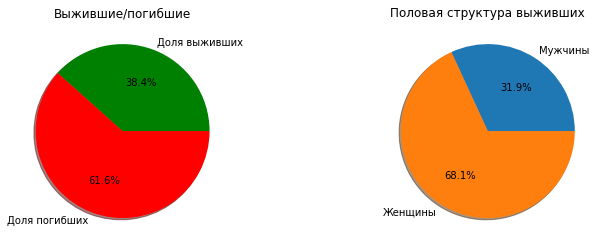

In [0]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
colors = ['green', 'red']

labels = 'Доля выживших', 'Доля погибших'
fracs = [data['Survived'].mean(), 1 - data['Survived'].mean()]
axs[0].pie(fracs, labels=labels, autopct='%1.1f%%', shadow=True, colors=colors)
axs[0].set_title('Выжившие/погибшие')

labels = 'Мужчины', 'Женщины'
fracs = [survmen / (survmen + survwomen), 
         survwomen / (survmen + survwomen)]
axs[1].pie(fracs, labels=labels, autopct='%.1f%%', shadow=True)
axs[1].set_title('Половая структура выживших')

fig.show()

### 14

Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?

In [0]:
# your code here
pclass = data['Pclass'].value_counts()
print("1-ым классом ехало %d пассажиров, 2-ым классом — %d пассажиров, 3-им — %d пассажиров" %
      (pclass[1], pclass[2], pclass[3])
      )

print('-'*40)

pclass_sex = data[data['Pclass'] == max(data['Pclass'])]['Sex'].value_counts()
print("В самом многолюдном классе мужчин (%d) было больше, чем женщин (%d)" %
      (pclass_sex['male'], pclass_sex['female'])
      )


1-ым классом ехало 216 пассажиров, 2-ым классом — 184 пассажиров, 3-им — 491 пассажиров
----------------------------------------
В самом многолюдном классе мужчин (347) было больше, чем женщин (144)


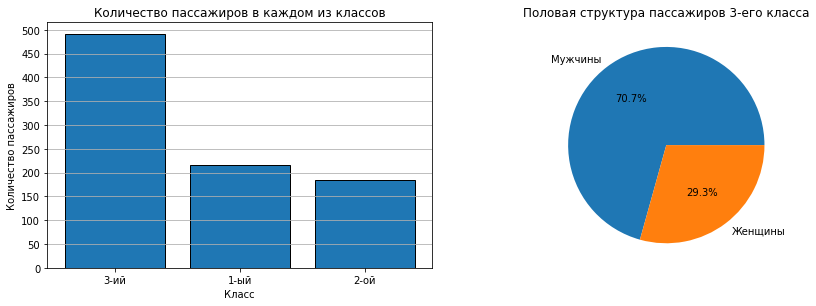

In [0]:
x = (1, 2, 3)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
fig.tight_layout()

ax[0].bar(x, pclass, edgecolor='black')
ax[0].grid('major', axis='y')
ax[0].set_xticks(x)
ax[0].set_xticklabels(("3-ий", "1-ый", "2-ой"))
ax[0].set_title('Количество пассажиров в каждом из классов')
ax[0].set_xlabel('Класс')
ax[0].set_yticks(np.arange(0, 501, step=50))
ax[0].set_ylabel('Количество пассажиров')

fracs = [pclass_sex['male']/pclass.count(), pclass_sex['female']/pclass.count()]
labels = ["Мужчины", "Женщины"]
ax[1].pie(fracs, labels=labels, autopct='%.1f%%')
ax[1].set_title('Половая структура пассажиров 3-его класса')

plt.show()

### 15

Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки.

In [0]:
# your code here
minFare = min(data['Fare'])
maxFare = max(data['Fare'])
meanFare = data['Fare'].mean()
print('Минимальная сумма, заплаченная за проезд составила $%d, максимальная — $%.2f. Средняя стоимость билета равна $%.2f' %
      (minFare, maxFare, meanFare)
      )

print('-'*40)
minFareS = min(data[data['Embarked'] == 'S']['Fare'])
maxFareS = max(data[data['Embarked'] == 'S']['Fare'])
meanFareS = data[data['Embarked'] == 'S']['Fare'].mean()
print('Для тех пассажиров, которые сели на корабль в Саутгемптоне:')
print('Минимальная сумма, заплаченная за проезд составила $%d, максимальная — $%.2f. Средняя стоимость билета равна $%.2f' %
      (minFareS, maxFareS, meanFareS)
)

Минимальная сумма, заплаченная за проезд составила $0, максимальная — $512.33. Средняя стоимость билета равна $32.20
----------------------------------------
Для тех пассажиров, которые сели на корабль в Саутгемптоне:
Минимальная сумма, заплаченная за проезд составила $0, максимальная — $263.00. Средняя стоимость билета равна $27.08


Гистограммы распределений стоимостей билетов в зависимости от места посадки:


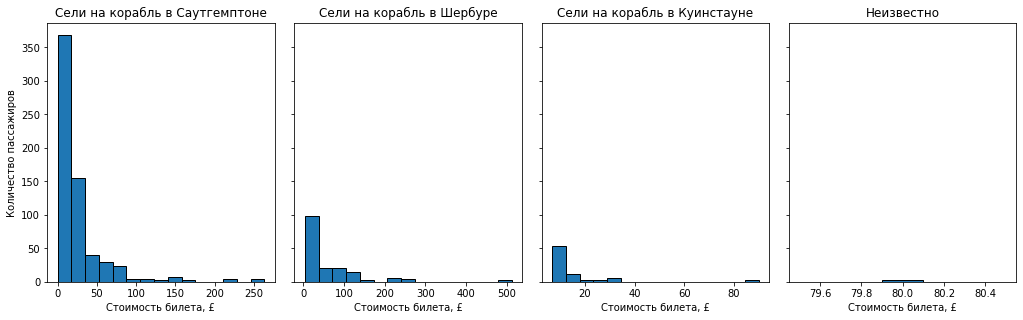

In [0]:
fig, ax = plt.subplots(1, 4, sharex='col', sharey='row', figsize=(14, 4))

fig.tight_layout(pad=0.4)
ax[0].set_ylabel('Количество пассажиров')
emb = ['Саутгемптоне', 'Шербуре', 'Куинстауне']

for i, j in zip(range(3), data['Embarked'].unique()):
  ax[i].hist(data['Fare'][(data['Embarked'] == j)], bins=15, edgecolor='black')
  ax[i].set_xlabel('Стоимость билета, £')
  ax[i].set_title('Сели на корабль в %s' % (emb[i]))

ax[3].hist(data['Fare'][(data['Embarked'].isnull())], bins=5, edgecolor='black')
ax[3].set_xlabel('Стоимость билета, £')
ax[3].set_title('%s' % ('Неизвестно'))

print('Гистограммы распределений стоимостей билетов в зависимости от места посадки:')
fig.show()

### 16

Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.

In [0]:
# your code here
data = pd.read_csv('train.csv', encoding='utf-8', index_col=0) # Изначальный датасет

print('Признак PassengerId не дает никакого представления о характеристиках пассажира, поскольку это просто порядковый номер.')
print('— Используется как ось для индексов')
# data.drop(['PassengerId'], axis=1).head()
print('-'*40)
print('Столбец Cabin, обозначающий номер каюты имеет очень много пропусков, строковый (имеет множество уникальных значений),')
print('поэтому, на мой взгляд, может быть удален.')
print('-'*40)
print('Такие признаки как Name и Ticket являются строковыми, имеют разный формат, сложны для обработки и почти не дают какой-либо')
print('количественной или качественной информации о пассажире (разве что можно выделить титул/соц. статус из имени),')
print('— а значит, можно от них избавиться.')
data.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)
data.head()

Признак PassengerId не дает никакого представления о характеристиках пассажира, поскольку это просто порядковый номер.
— Используется как ось для индексов
----------------------------------------
Столбец Cabin, обозначающий номер каюты имеет очень много пропусков, строковый (имеет множество уникальных значений),
поэтому, на мой взгляд, может быть удален.
----------------------------------------
Такие признаки как Name и Ticket являются строковыми, имеют разный формат, сложны для обработки и почти не дают какой-либо
количественной или качественной информации о пассажире (разве что можно выделить титул/соц. статус из имени),
— а значит, можно от них избавиться.


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


### 17

Есть ли в данных пропуски? Если да, то в каких столбцах? Сколько пропусков в каждом из них?

In [0]:
# your code here

data = pd.read_csv('train.csv', encoding='utf-8', index_col=0) # Изначальный датасет

data.info()

print('-'*40)

if data.isnull().any().any():
  print('В данных есть пропуски')
  print('-'*40)
  print('Пропуски обнаружены в следующих столбцах:')
  miss = data.isnull().any()[data.isnull().any() == True]
  print(miss)
  print('-'*40)
  for i in miss.index:
    print('В столбце %s: %d пропусков' % (i, sum(data[i].isnull())))
else:
  print('Пропусков нет')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
----------------------------------------
В данных есть пропуски
----------------------------------------
Пропуски обнаружены в следующих столбцах:
Age         True
Cabin       True
Embarked    True
dtype: bool
----------------------------------------
В столбце Age: 177 пропусков
В столбце Cabin: 687 пропусков
В столбце Embarked: 2 пропусков


### 18

Подумайте, как стоит заполнить пропуски в каждом столбце в зависимости от его типа, и сделайте это. Проверьте, что пропусков нигде не осталось.

In [0]:
# your code here

data = pd.read_csv('train.csv', encoding='utf-8', index_col=0) # Изначальный датасет

print('Заполним пропуски в столбце Embarked (пропущено место посадки на корабль), посмотрим на номера билетов:')
print('-'*40)
print(data[data['Embarked'].isnull()]['Ticket'])
print('-'*40)
print('Можно видеть, что начинаются на 113 билеты у тех пассажиров, которые отправлялись из Саутгемптона, например:')
print('-'*40)
print(data.loc[[4, 12, 24, 36], ['Ticket', 'Embarked']])
data['Embarked'].fillna('S', inplace=True)

print('-'*40)
print('Можно попробовать предсказать возраст тек пассажиров, у которых он не указан, или же заменить средним значением (что исказит данные: ')
print('распределение станет чересчур островершинным). Однако если предположить, что пропущена случайная выборка, имеющая такое же распределение')
print('как и заполненные данные, можно заменить пропуски случайными значениями из логнормального распределения ')
print('(нормальное не подойдет из-за отр. хвоста). За мат. ожидание случайной величины примем среднее значение, ')
print('за дисперсию - среднеквадратичное отклонение.')

np.random.seed(4318860)

ind = np.arange(1, len(data) + 1)[data['Age'].isna()]

mx = data[data['Age'].notna()]['Age'].mean()
dx = data[data['Age'].notna()]['Age'].std()**2

# Параметры логнормального распределения
nu = np.log((mx)**2/np.sqrt(dx+(mx)**2))
sigma = np.log((dx+(mx)**2)/(mx)**2)

x = np.random.lognormal(nu, sigma, 177)

data['Age'].fillna(pd.Series(x, index=ind), inplace=True)

print('-'*40)

print('Столбец Cabin, с номерами кают, заполним строками, указывающими на отсутсвие значения')
data['Cabin'].fillna('NG', inplace=True)
print('-'*40)

data.info()

print('-'*40)
print('Пропуски есть? - ' + str(data.isnull().any().any()))

Заполним пропуски в столбце Embarked (пропущено место посадки на корабль), посмотрим на номера билетов:
----------------------------------------
PassengerId
62     113572
830    113572
Name: Ticket, dtype: object
----------------------------------------
Можно видеть, что начинаются на 113 билеты у тех пассажиров, которые отправлялись из Саутгемптона, например:
----------------------------------------
             Ticket Embarked
PassengerId                 
4            113803        S
12           113783        S
24           113788        S
36           113789        S
----------------------------------------
Можно попробовать предсказать возраст тек пассажиров, у которых он не указан, или же заменить средним значением (что исказит данные: 
распределение станет чересчур островершинным). Однако если предположить, что пропущена случайная выборка, имеющая такое же распределение
как и заполненные данные, можно заменить пропуски случайными значениями из логнормального распределения 
(норм

### 19

Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. Также проверьте наличие этой зависимости визуально (в этом вам поможет построение [диаграммы рассеяния](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D1%80%D0%B0%D1%81%D1%81%D0%B5%D1%8F%D0%BD%D0%B8%D1%8F)).

Коэффициент корреляции между возрастом и ценой билета равен 0.1045.
Поскольку коэффициент корреляции положителен, то с увеличением возраста растет и цена билета.
Тем не менее, связь между данными велечинами очень слабая (низкое значение коэффициента по модулю), что подтверждается диаграммой:


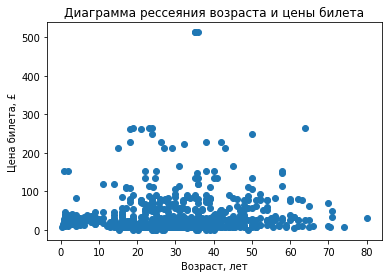

In [0]:
# your code here
print('Коэффициент корреляции между возрастом и ценой билета равен %.4f.' %
      data[['Age', 'Fare']].corr().iloc[0, 1]
)
print('Поскольку коэффициент корреляции положителен, то с увеличением возраста растет и цена билета.')
print('Тем не менее, связь между данными велечинами очень слабая (низкое значение коэффициента по модулю), что подтверждается диаграммой:')
plt.scatter(data['Age'], data['Fare'])
plt.xlabel('Возраст, лет')
plt.ylabel('Цена билета, £')
plt.title('Диаграмма рессеяния возраста и цены билета')
plt.show()

### 20

Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса?

Коэффициент корреляции между выживаемостью и ценой билета равен 0.2573.
Коэффициент больше 0, значит с увеличением стоимости билета, растет число выживших.
Велечина коэффициента корреляции (по модулю) показывает, что имеется слабая связь между данными показателями.
На диаграмме ниже видно, что зеленые точки (выжившие) сконцентрированны несколько выше красных точек (погибшие),
что также подтверждает связь показателей:


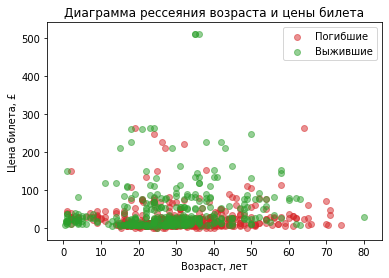

In [0]:
# your code here
print('Коэффициент корреляции между выживаемостью и ценой билета равен %.4f.' %
      data[['Survived', 'Fare']].corr().iloc[0, 1]
)
print('Коэффициент больше 0, значит с увеличением стоимости билета, растет число выживших.')
print('Велечина коэффициента корреляции (по модулю) показывает, что имеется слабая связь между данными показателями.')
print('На диаграмме ниже видно, что зеленые точки (выжившие) сконцентрированны несколько выше красных точек (погибшие),')
print('что также подтверждает связь показателей:')

fig, ax = plt.subplots()
for i in [(0, 'tab:red'), (1, 'tab:green')]:
  mask = data['Survived'] == i[0]
  ax.scatter(data[mask]['Age'], data[mask]['Fare'], c=i[1], alpha=0.5)
  ax.set_xlabel('Возраст, лет')
  ax.set_ylabel('Цена билета, £')
  ax.set_title('Диаграмма рессеяния возраста и цены билета')

ax.legend(['Погибшие', 'Выжившие'])
plt.show()

Коэффициент корреляции между выживаемостью и классом билета равен -0.3385.
Коэффициент отрицателен, значит с увеличением класса, уменьшается число выживших.
Связь показателей можно охарактеризовать как слабую, но, тем не менее, она выше, чем между ценой и выживаемостью.
Исходя из диаграммы ниже, можно сделать вывод, что большая часть пассажиров 1-ого класса выжила (62.96%), в то время как
во 2-ом классе больше половины пассажиров погибло (47.28% выжили), а в 3-м классе только 24.24% пассажиров осталось в живых:


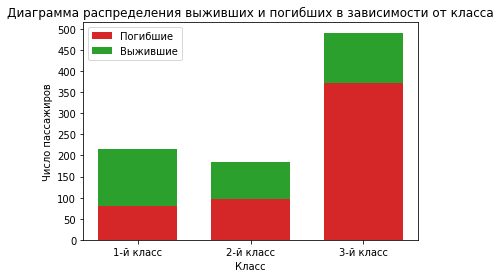

In [0]:
# Количество выживших/погибших по классам
alive = [
         len(data[(data['Survived'] == 1) & (data['Pclass'] == i)])
         for i in range(1, 4)
         ]

dead = [
        len(data[(data['Survived'] == 0) & (data['Pclass'] == i)])
        for i in range(1, 4)
        ]
per = [100*alive[i]/(alive[i]+dead[i]) for i in range(0,3)]

print('Коэффициент корреляции между выживаемостью и классом билета равен %.4f.' %
      data[['Pclass', 'Survived']].corr().iloc[0, 1]
)
print('Коэффициент отрицателен, значит с увеличением класса, уменьшается число выживших.')
print('Связь показателей можно охарактеризовать как слабую, но, тем не менее, она выше, чем между ценой и выживаемостью.')
print('Исходя из диаграммы ниже, можно сделать вывод, что большая часть пассажиров 1-ого класса выжила (%.2f%%), в то время как' % per[0])
print('во 2-ом классе больше половины пассажиров погибло (%.2f%% выжили), а в 3-м классе только %.2f%% пассажиров осталось в живых:' %
      (per[1], per[2]))

ind = np.arange(3)

p1 = plt.bar(ind, dead, width = 0.7, color='tab:red')
p2 = plt.bar(ind, alive, width = 0.7, bottom=dead, color='tab:green')
plt.title('Диаграмма распределения выживших и погибших в зависимости от класса')
plt.ylabel('Число пассажиров')
plt.xlabel('Класс')
plt.xticks(ind, ('1-й класс', '2-й класс', '3-й класс'))
plt.yticks(np.arange(0, 501, step=50))
plt.legend((p1[0], p2[0]), ('Погибшие', 'Выжившие'))

plt.show()

### 21

Создание новых признаков (feature engineering) является одним из основных средств улучшения качества работы алгоритмов машинного обучения на этапе обработки данных. Добавьте в таблицу столбец, который будет показывать, сколько родных плыло вместе с пассажиром на корабле, включая его самого. Затем придумайте свой признак, который может быть полезен для алгоритма (несет в себе какую-то информацию), и добавьте его в таблицу.

In [0]:
# your code here
import re

# Столбец, показывающий сколько родных ехало с пассажиром
data['Relatives'] = data['SibSp'] + data['Parch'] + 1

# Столбец, показывающий социальный статус человека
def get_status(name: str) -> str:
  '''
  Функция возвращает социальный статус из имени
  '''
  s = re.search('\, .*\.', name)
  s = re.search('[a-zA-Z]+\s*[a-zA-Z]*', s.group(0))
  return s.group(0)

data['Status'] = data['Name'].apply(get_status)
print(data['Status'].value_counts())

data[['Relatives', 'Status']]

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Lady              1
Don               1
Capt              1
Jonkheer          1
Ms                1
Sir               1
the Countess      1
Mme               1
Name: Status, dtype: int64


,Relatives,Status
PassengerId,,
1,2,Mr
2,2,Mrs
3,1,Miss
4,2,Mrs
5,1,Mr
...,...,...
887,1,Rev
888,1,Miss
889,4,Miss


### 22

Придумайте какое-нибудь интересное задание на анализ предлагаемых данных и решите его. Например, какая фамилия была самой популярной на корабле?

Задача: выяснить, способствовал ли социальный статус выживанию на корабле
----------------------------------------
Для того, чтобы это выяснить построим диаграмму, представленную ниже:


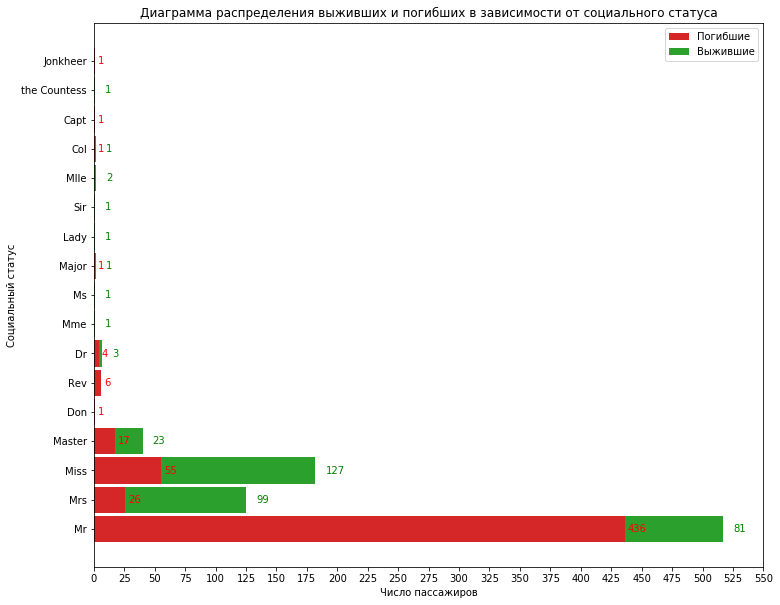

----------------------------------------
Можно видеть, что высокий социальный статус не так важен для выживания:
Jonkheer (низкий ранг в дворянстве), Capt (капитан), 1 из 2 полковников (Col),
1 из 2 майоров (Major), 4 из 7 докторов (Dr), все священнослужители(Rev) и т.д. погибли.
Тем не менее, можно заметить, что скорее пол играл более важную роль:
большая часть женщин (Mrs., Miss., Mme., Lady и т.д.) выжила в катастрофе.


In [0]:
# your code here

print('Задача: выяснить, способствовал ли социальный статус выживанию на корабле')
print('-'*40)
print('Для того, чтобы это выяснить построим диаграмму, представленную ниже:')

alive = [
         len(data[(data['Survived'] == 1) & (data['Status'] == i)])
         for i in data['Status'].unique()
         ]

dead = [
        len(data[(data['Survived'] == 0) & (data['Status'] == i)])
        for i in data['Status'].unique()
        ]

ind = np.arange(17)
height = 0.9

fig, ax = plt.subplots(figsize=(12, 10))
p1 = ax.barh(ind, dead, height = height, color='tab:red')
p2 = ax.barh(ind, alive, height = height, left=dead, color='tab:green')
ax.set_title('Диаграмма распределения выживших и погибших в зависимости от социального статуса')
ax.set_xlabel('Число пассажиров')
ax.set_ylabel('Социальный статус')
ax.set_yticks(ind)
ax.set_yticklabels(data['Status'].unique())
ax.set_xticks(np.arange(0, 551, step=25))
plt.legend((p1[0], p2[0]), ('Погибшие', 'Выжившие'))

def autolabel(rects1, rects2):
  for rect1, rect2 in zip(rects1, rects2):
    width = rect1.get_width() # Погибли
    widtha = rect2.get_width() # Выжили
    if width != 0:
      ax.annotate(
          '{}'.format(width),
          xy = (width, rect1.get_y() + rect1.get_height() / 2),
          xytext=(3, -3),
          textcoords="offset points",
          color = 'r',
      )
    if widtha != 0:
      ax.annotate(
          '{}'.format(widtha),
          xy = (width + widtha, rect1.get_y() + rect1.get_height() / 2),
          xytext=(10, -3),
          textcoords="offset points",
          color = 'g',
      )

autolabel(p1, p2)

plt.show()

print('-'*40)

print('Можно видеть, что высокий социальный статус не так важен для выживания:')
print('Jonkheer (низкий ранг в дворянстве), Capt (капитан), 1 из 2 полковников (Col),')
print('1 из 2 майоров (Major), 4 из 7 докторов (Dr), все священнослужители(Rev) и т.д. погибли.')
print('Тем не менее, можно заметить, что скорее пол играл более важную роль:')
print('большая часть женщин (Mrs., Miss., Mme., Lady и т.д.) выжила в катастрофе.')

### 23

Постройте гистограммы распределения вещественных признаков. Есть ли в них разница? Чем это может быть плохо с точки зрения машинного обучения? Отнормируйте вещественные признаки и посмотрите, как изменилась ситуация.

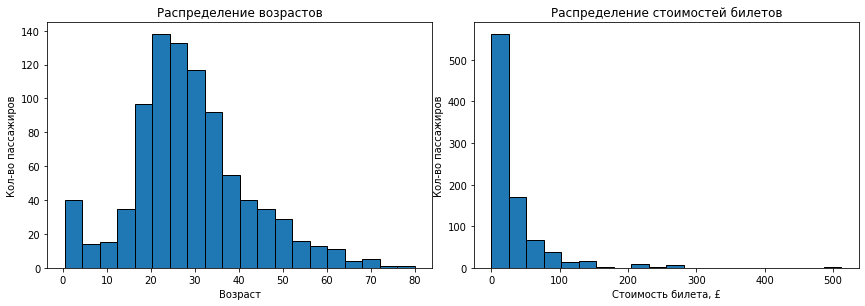

In [0]:
# your code here
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

fig.tight_layout()

ax[0].hist(data['Age'], bins = 20, ec='black')
ax[0].set_title('Распределение возрастов')
ax[0].set_xlabel('Возраст')
ax[0].set_ylabel('Кол-во пассажиров')

ax[1].hist(data['Fare'], bins = 20, ec='black')
ax[1].set_title('Распределение стоимостей билетов')
ax[1].set_xlabel('Стоимость билета, £')
ax[1].set_ylabel('Кол-во пассажиров')

fig.show()

Распределение возрастов напоминает нормальное (за исключением отрицательного хвоста) или логнормальным распределение, не считая столбика у нуля. У распределения стоимости билетов есть сходства с экспоненциальным распределением. 

Проблема распределения цен билетов заключается в том, что присутствуют выбросы, где значение характеристики экстремально высокое, например, билет стоимостью 512 £. При использовании методов машинного обучения выбросы могут искажать поиск оптимальных параметров. 

Более того, характеристики имеют разные шкалы, выражающиеся в десятках, сотнях. Так например, в результате применения метода KNN, найденные значение коэффициентов могут создавать ложное впечатление, что коэффициент с большим значением важнее, хотя это вовсе не так. 

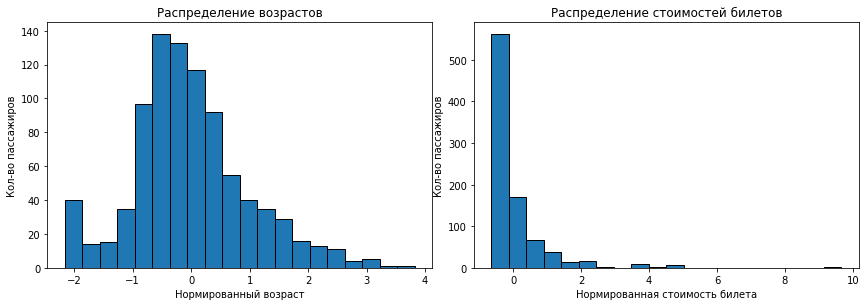

In [0]:
# Нормирование
meanFare = data['Fare'].mean()
stdFare = data['Fare'].std()

data['Fare'] = (data['Fare'] - meanFare) / stdFare

meanAge = data['Age'].mean()
stdAge = data['Age'].std()

data['Age'] = (data['Age'] - meanAge) / stdAge

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Новые графики
fig.tight_layout()

ax[0].hist(data['Age'], bins = 20, ec='black')
ax[0].set_title('Распределение возрастов')
ax[0].set_xlabel('Нормированный возраст')
ax[0].set_ylabel('Кол-во пассажиров')

ax[1].hist(data['Fare'], bins = 20, ec='black')
ax[1].set_title('Распределение стоимостей билетов')
ax[1].set_xlabel('Нормированная стоимость билета')
ax[1].set_ylabel('Кол-во пассажиров')

fig.show()

В результате нормирования получилось, что размах значений возрастов чуть больше 5, тогда как стоимость билета имеет размах чуть более 10 единиц.

### 24

Есть ли в данных категориальные признаки, которые принимают значения строк, а не чисел? Если да, то для многих алгоритмов машинного обучения это может стать серьезным препятствием, поэтому закодируйте категориальные признаки так, чтобы к данным можно было применить любые алгоритмы машинного обучения.

In [0]:
# your code here

print('В данных остались следующие строковые признаки: пол, место отправки и соц. статус')

# Кодирование пола
def encode_sex(sex: str) -> int:
  if sex == 'male':
    return 0
  elif sex == 'female':
    return 1
  return None

data['Sex'] = data['Sex'].apply(encode_sex)

# Кодирование места посадки на корабль
def encode_embarked(embarked: str) -> int:
  if embarked == 'S':
    return 1
  elif embarked == 'C':
    return 2
  elif embarked ==  'Q':
    return 3
  return None

data['Embarked'] = data['Embarked'].apply(encode_embarked)

# Сопоставить статус числу
statDict = dict()
n = 1
for stat in data['Status'].unique():
  statDict[stat] = n
  n += 1

# Кодирование социального статуса
def encode_status(statDict: dict, status: str) -> int:
  return statDict[status]

data['Status'] = data['Status'].apply(lambda x: encode_status(statDict, x))

data.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True) # Отбросить лишнее... 

data

В данных остались следующие строковые признаки: пол, место отправки и соц. статус


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,Status
PassengerId,,,,,,,,,,
1,0,3,0,-0.540609,1,0,-0.502163,1,2,1
2,1,1,1,0.662736,1,0,0.786404,2,2,2
3,1,3,1,-0.239773,0,0,-0.488580,1,1,3
4,1,1,1,0.437109,1,0,0.420494,1,2,2
5,0,3,0,0.437109,0,0,-0.486064,1,1,1
...,...,...,...,...,...,...,...,...,...,...
887,0,2,0,-0.164564,0,0,-0.386454,1,1,6
888,1,1,1,-0.766236,0,0,-0.044356,1,1,3
889,0,3,1,-0.947131,1,2,-0.176164,1,4,3


# Часть 3. Matplotlib

### 25

Отобразите гистограмму распределения возрастов для каждого класса пассажиров. В результате вы должны получить три гистограммы, которые необходимо отобразить друг рядом с другом, используя функцию `plt.subplots`. Каждая гистограмма должна быть нормирована. Обратите внимание на параметры `figsize`, `sharey` функции `plt.subplots`. Также полезными могут оказаться параметры `bins`, `ec`, `density` функции `plt.hist`, а также функции `set_xlabel`, `set_ylabel`, `set_title` и `plt.tight_layout`.

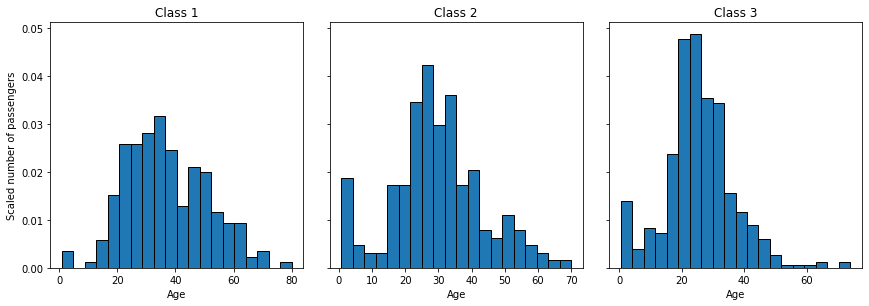

In [0]:
# В итоге ваш график должен получиться примерно таким:

fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(12, 4))

fig.tight_layout()
ax[0].set_ylabel('Scaled number of passengers')
# fig.subplots_adjust(wspace=0.05)
for i in range(3):
  ax[i].hist(data[(data['Pclass'] == i+1)]['Age'], bins=20, edgecolor='black', density=True)
  ax[i].set_xlabel('Age')
  ax[i].set_title('Class %d' % (i + 1))

fig.show()

### 26

Нарисуйте график косинуса для `x` от `-1` до `5`. Также пунктирной линией изобразите график синуса для `x` на том же промежутке. Укажите на графике легенду.

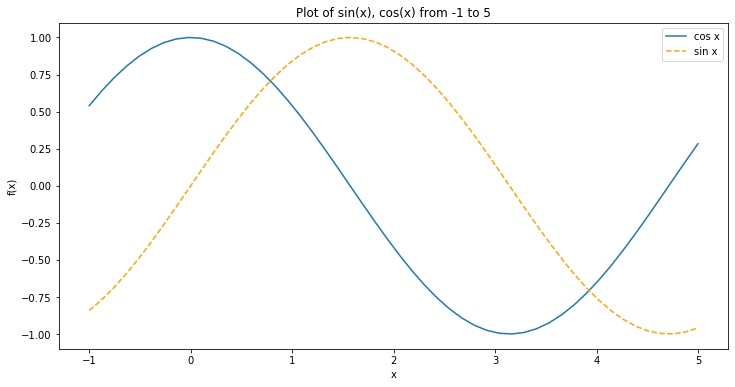

In [0]:
# В итоге ваш график должен получиться примерно таким:

x = np.linspace(-1, 5, 50)
y = np.sin(x)
z = np.cos(x)
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
ax.plot(x, z, '-', label='cos x')
ax.plot(x, y, '--', color='orange', label='sin x')
leg = ax.legend();
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('Plot of sin(x), cos(x) from -1 to 5')

fig.show()

### 27

Постройте диаграмму рассеяния (scatter plot) для пассажиров. Ось x должна обозначать возраст пассажира, ось y - стоимость его проезда. Обозначьте выживших и погибших пассажиров разными светами и маркерами. Также укажите на графике легенду.

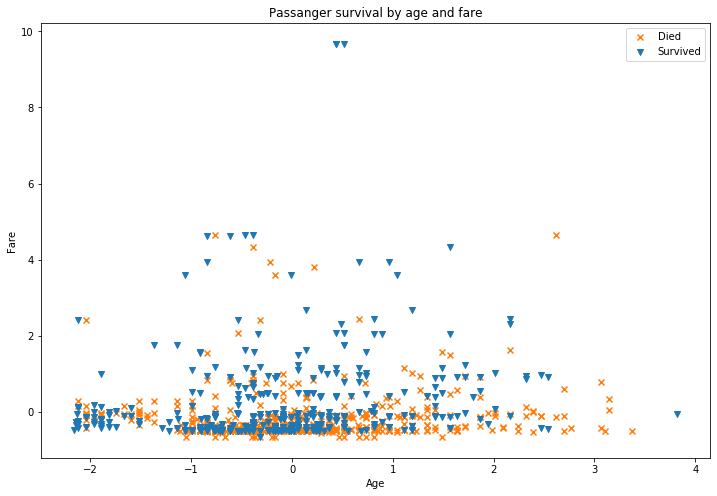

In [0]:
# В итоге ваш график должен получиться примерно таким:

fig, ax = plt.subplots(figsize=(12,8))
for i in [(0, 'tab:orange', "x"), (1, 'tab:blue', "v")]:
  mask = data['Survived'] == i[0]
  ax.scatter(data[mask]['Age'], data[mask]['Fare'], c=i[1], marker=i[2])
  ax.set_xlabel('Age')
  ax.set_ylabel('Fare')
  ax.set_title('Passanger survival by age and fare')

ax.legend(['Died', 'Survived'])
plt.show()